<img src="datamecum_logo.png" align="right" style="float" width="400">
<font color="#CA3532"><h1 align="left">Programa técnico intensivo en data science. Datamecum.</h1></font>
<font color="#6E6E6E"><h2 align="left">Análisis Exploratorio de Datos.</h2></font> 
<font color="#6E6E6E"><h2 align="left">Mosaic Plot.</h2></font> 

#### Regino Barranquero Cardeñosa, Marcelino Martínez Sober

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic



The most simple use case is to take a dictionary and plot the result


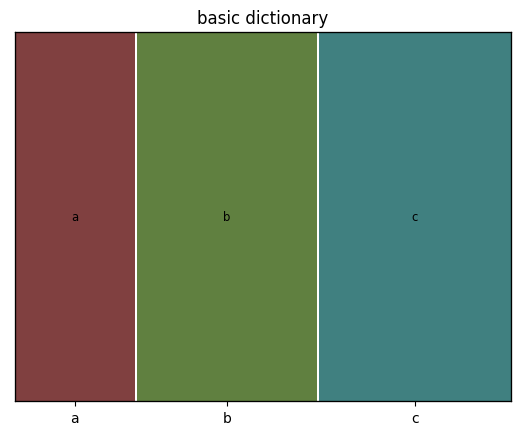

In [12]:

data = {'a': 10, 'b': 15, 'c': 16}
mosaic(data, title='basic dictionary')
plt.show()


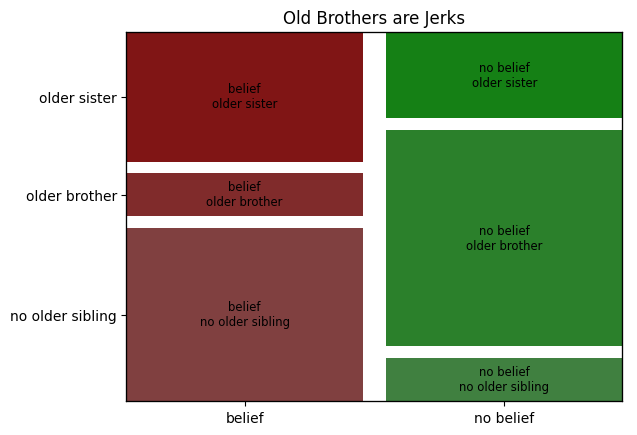

In [13]:
#A more useful example is given by a dictionary with multiple indices. In this case we use a wider gap to a better visual separation of the resulting plot

data = {('belief', 'no older sibling'): 4, ('belief', 'older brother'): 1, ('belief', 'older sister'): 3,
        ('no belief', 'no older sibling'): 1, ('no belief', 'older brother'): 5, ('no belief', 'older sister'): 2}
mosaic(data, gap=0.05, title='Old Brothers are Jerks')
plt.show()

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

In [15]:

data = pd.read_csv('https://raw.githubusercontent.com/qlik-oss/sse-r-plugin/master/sense_apps/R_DecisionTree/Titanic_data.csv')
data

ID  pclass  survived     sex     age  age_b    fare
0        1       1         1  female      29  Adult  211,34
1        2       1         1    male  0,9167  Child  151,55
2        3       1         0  female       2  Child  151,55
3        4       1         0    male      30  Adult  151,55
4        5       1         0  female      25  Adult  151,55
...    ...     ...       ...     ...     ...    ...     ...
1304  1305       3         0  female    14,5  Child   14,45
1305  1306       3         0  female     NaN  Adult   14,45
1306  1307       3         0    male    26,5  Adult    7,22
1307  1308       3         0    male      27  Adult    7,22
1308  1309       3         0    male      29  Adult    7,88

[1309 rows x 7 columns]

In [16]:
crosstable = pd.crosstab(data['survived'],data['sex'])
crosstable = pd.DataFrame(crosstable)
crosstable

sex       female  male
survived              
0            127   682
1            339   161

In [17]:
column_names=list(crosstable. columns) 
titanic_names=list(data.columns) 
props={}
props[(column_names[1],str(crosstable.index[1]))]={'facecolor' : 'red' , 'edgecolor': 'white'}
props[(column_names[1],str(crosstable.index[0]))]={'facecolor' : 'red' , 'edgecolor': 'white'}
props[(column_names[0],str(crosstable.index[1]))]={'facecolor' : 'xkcd:aqua' , 'edgecolor': 'white'}
props[(column_names[0],str(crosstable.index[0]))]={'facecolor' : 'xkcd:aqua' , 'edgecolor': 'white'}


In [18]:
labelizer=lambda k:{(column_names[1],str(crosstable.index[1])):crosstable.iloc[1,1],(column_names[0],str(crosstable.index[1])):crosstable.iloc[1,0],(column_names[1],str(crosstable.index[0])):crosstable.iloc[0,1],(column_names[0],str(crosstable.index[0])):crosstable.iloc[0,0]}[k]


(<Figure size 640x480 with 3 Axes>,
 {('female', '1'): (0.0, 0.0, 0.3542258151564561, 0.7250509745768754),
  ('female', '0'): (0.0,
   0.7283732337130879,
   0.3542258151564561,
   0.27162676628691196),
  ('male', '1'): (0.3592009395345656,
   0.0,
   0.6407990604654346,
   0.19035007862285855),
  ('male', '0'): (0.3592009395345656,
   0.19367233775907117,
   0.6407990604654346,
   0.8063276622409288)})

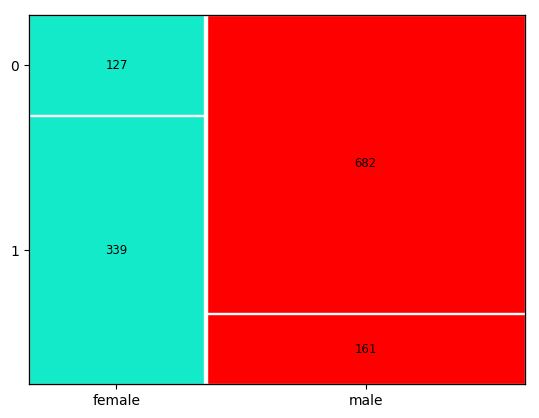

In [19]:
mosaic(data,[titanic_names[3],titanic_names[2]],labelizer=labelizer,properties=props)
